```python
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    'hakurei/waifu-diffusion',
    torch_dtype=torch.float32
).to('cuda')

prompt = "1girl, aqua eyes, baseball cap, blonde hair, closed mouth, earrings, green background, hat, hoop earrings, jewelry, looking at viewer, shirt, short hair, simple background, solo, upper body, yellow shirt"
with autocast("cuda"):
    image = pipe(prompt, guidance_scale=6)["sample"][0]  
    
image.save("test.png")
```

/Users/user/Documents/GitHub/stable-diffusion-playground/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 15 files: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 76818.75it/s]
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
  0%|                                                                                                                                                      

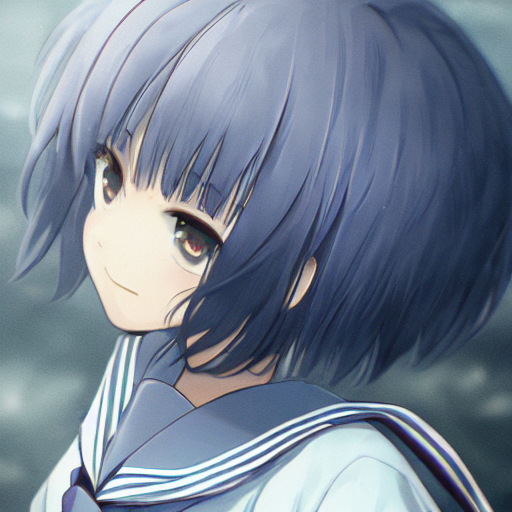

In [1]:
from datetime import datetime
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler

model_id = "hakurei/waifu-diffusion"
device = "mps"
# generator = torch.Generator(device=device).manaul_seed(123)

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float32,
    # scheduler=DDIMScheduler(
    #     beta_start=0.00085,
    #     beta_end=0.012,
    #     beta_schedule="scaled_linear",
    #     clip_sample=False,
    #     set_alpha_to_one=False,
    # ),
)
pipe = pipe.to(device)
pipe.safety_checker = None

prompt = "extremely detailed CG wallpaper," \
    "dark blue hair," \
    "short hair," \
    "light blue sailor suit," \
    "school student girl," \
    "pretty girl," \
    "slight smile," \
    "kawaii," \
    "soft focus," \
    "beautiful composition"

# First-time "warmup" pass (see explanation above)
_ = pipe(prompt, num_inference_steps=1)

# Results match those from the CPU device after the warmup pass.
image = pipe(
    prompt,
    guidance_scale=6,
    # generator=generator,
).images[0]
datetime_str = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
image.save(f"images/{datetime_str}.jpg")
image